<a href="https://colab.research.google.com/github/fahmihwdi300303/PCVK_GANJIL_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

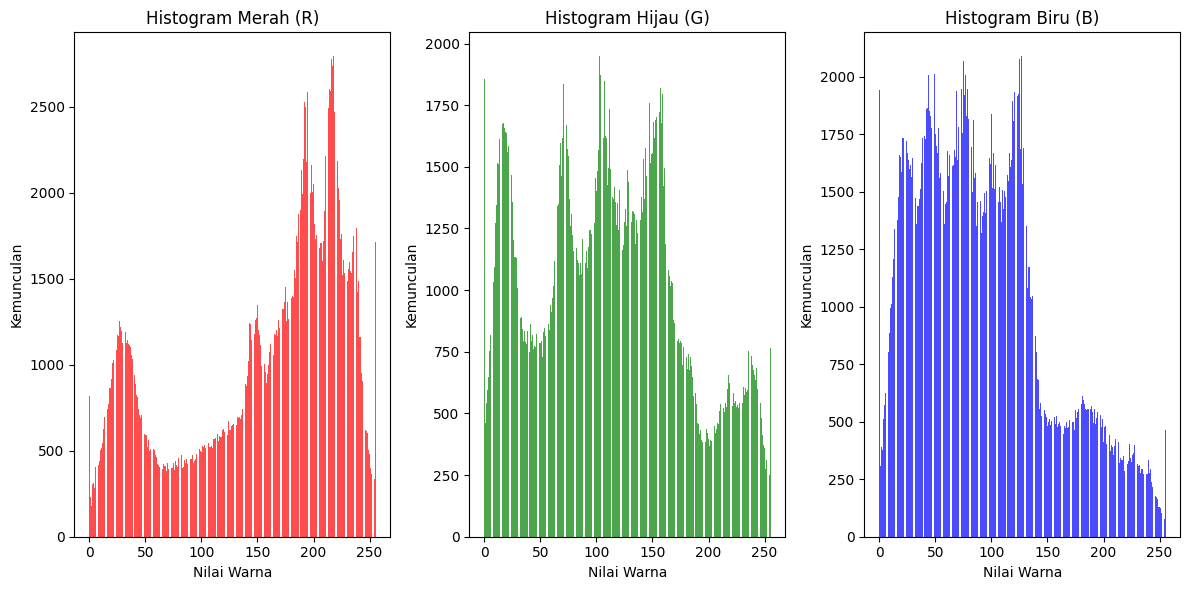

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread("/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg")

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Hitung histogram untuk setiap saluran warna R, G, dan B
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r[:, 0], color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g[:, 0], color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b[:, 0], color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

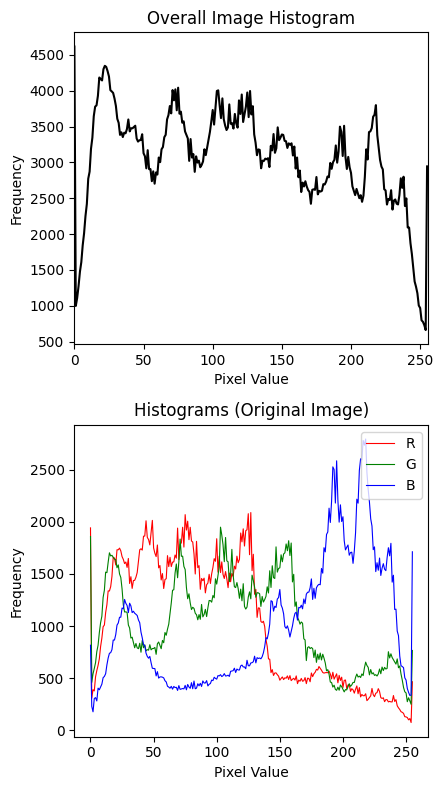

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original = cv2.imread('/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg')

# Split the image into R, G, B channels
r_channel, g_channel, b_channel = cv2.split(original)

# Calculate histograms for the original image
hist_original_r = np.histogram(r_channel.ravel(), bins=256, range=(0, 256))[0]
hist_original_g = np.histogram(g_channel.ravel(), bins=256, range=(0, 256))[0]
hist_original_b = np.histogram(b_channel.ravel(), bins=256, range=(0, 256))[0]

histogram, bin_edges = np.histogram(original.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(12, 8))

# Plot the overall histogram
plt.subplot(2, 3, 1)
plt.title('Overall Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(histogram, color='black')
plt.xlim([0, 256])

# Plot histograms for R, G, and B channels of the original image
plt.subplot(2, 3, 4)
plt.plot(hist_original_r, color='red', label='R', linewidth=0.8)
plt.plot(hist_original_g, color='green', label='G', linewidth=0.8)
plt.plot(hist_original_b, color='blue', label='B', linewidth=0.8)
plt.title('Histograms (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


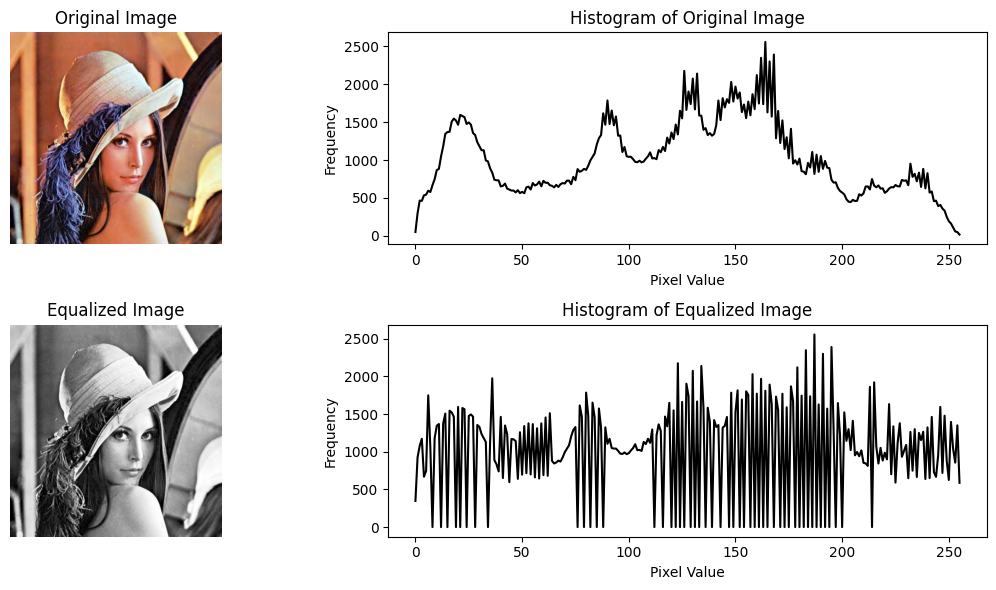

In [5]:
# Load the image
original = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg')

# Convert to grayscale
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv.equalizeHist(gray_image)

# Calculate histograms
hist_original = cv.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the original image and its histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Display the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


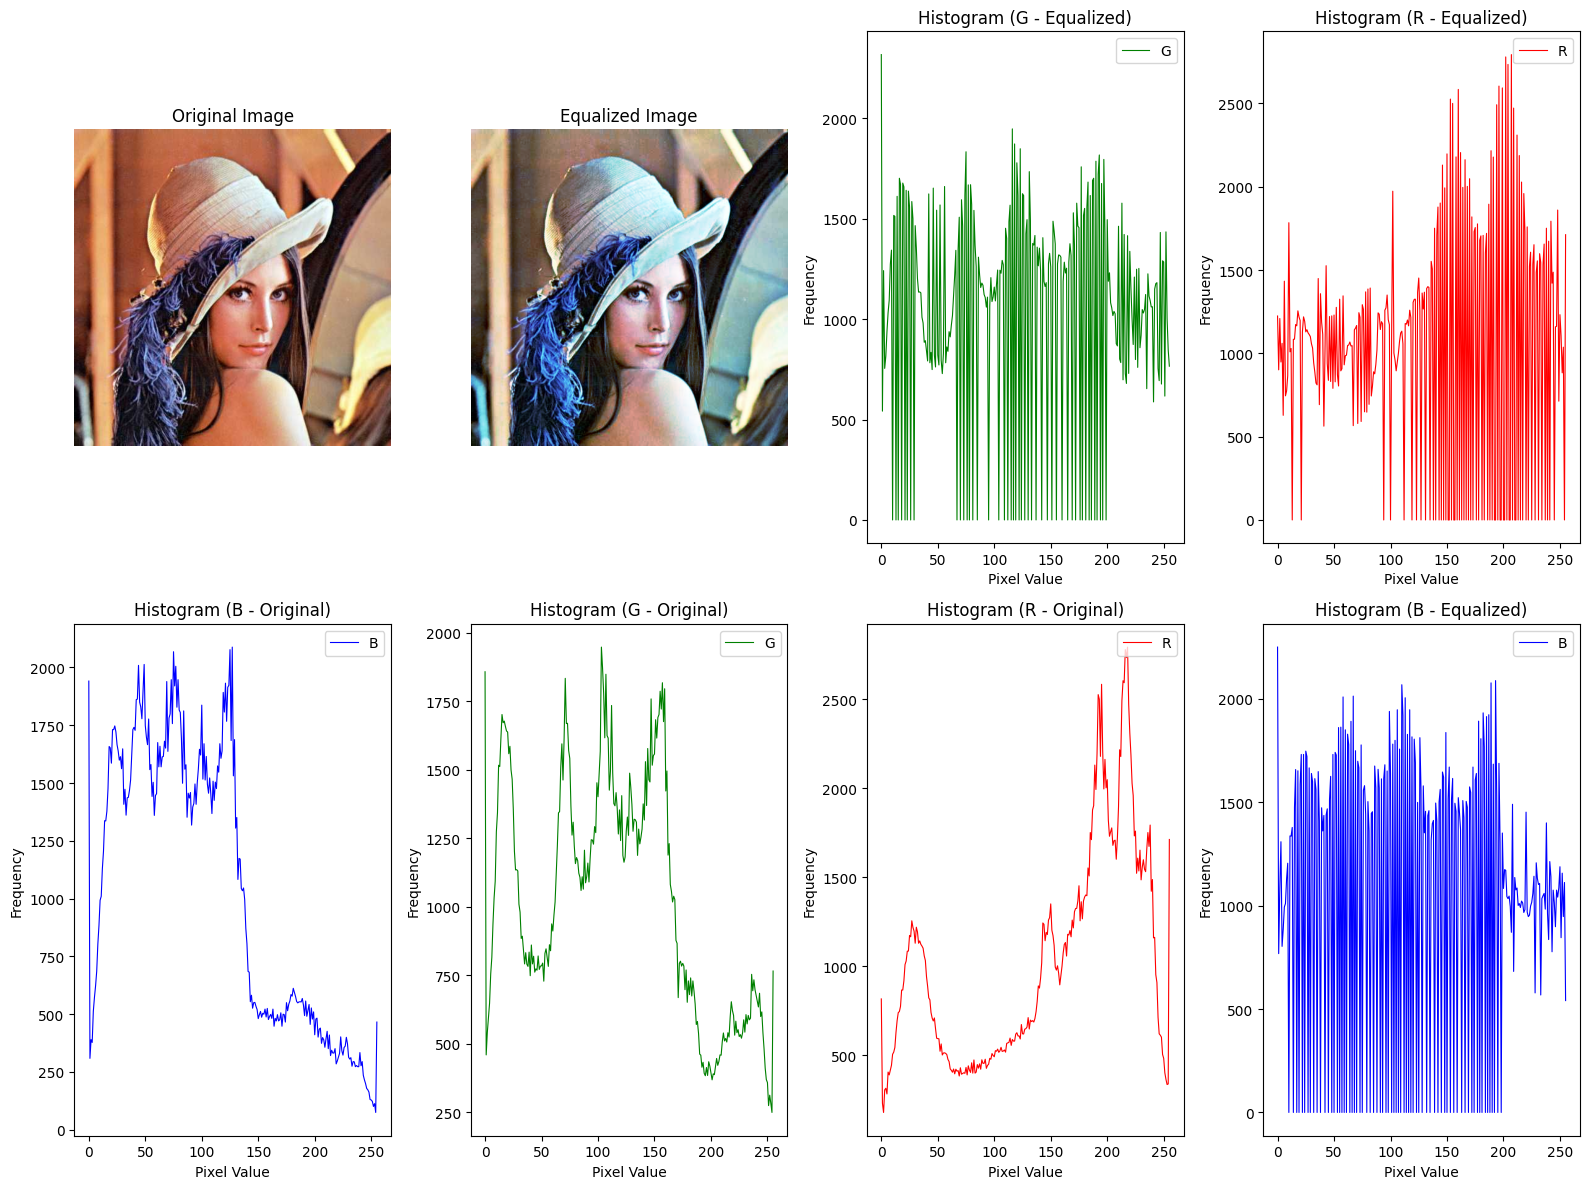

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
original = cv2.imread('/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg')

# Split the image into B, G, R channels
b, g, r = cv2.split(original)

# Perform histogram equalization on each channel
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((b_eq, g_eq, r_eq))

# Calculate histograms for the original and equalized images
hist_original_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_original_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_original_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([b_eq], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([r_eq], [0], None, [256], [0, 256])

# Display original and equalized images along with their histograms
plt.figure(figsize=(16, 12))

# Original RGB image
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized RGB image
plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

# Histograms for B, G, and R channels of the original image
plt.subplot(2, 4, 5)
plt.plot(hist_original_b, color='blue', label='B', linewidth=0.8)
plt.title('Histogram (B - Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(2, 4, 6)
plt.plot(hist_original_g, color='green', label='G', linewidth=0.8)
plt.title('Histogram (G - Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(2, 4, 7)
plt.plot(hist_original_r, color='red', label='R', linewidth=0.8)
plt.title('Histogram (R - Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Histograms for B, G, and R channels of the equalized image
plt.subplot(2, 4, 8)
plt.plot(hist_equalized_b, color='blue', label='B', linewidth=0.8)
plt.title('Histogram (B - Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(2, 4, 3)
plt.plot(hist_equalized_g, color='green', label='G', linewidth=0.8)
plt.title('Histogram (G - Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.subplot(2, 4, 4)
plt.plot(hist_equalized_r, color='red', label='R', linewidth=0.8)
plt.title('Histogram (R - Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


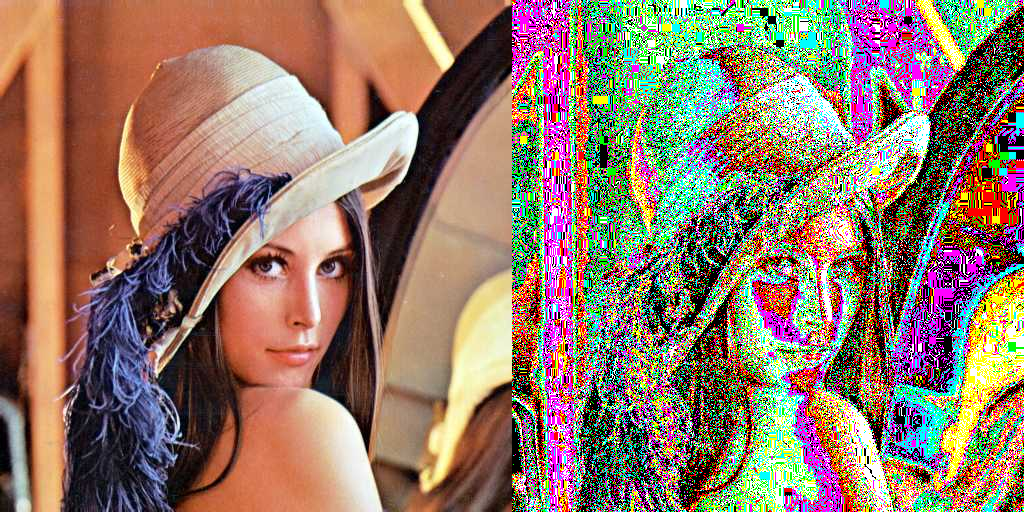

In [9]:
# Load the image
original = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg')

# Define the 8 colors you want to map to
colors = np.array([
    [0, 0, 0],       # Black
    [0, 255, 0],     # Green
    [255, 255, 0],   # Yellow
    [0, 0, 255],     # Blue
    [0, 255, 255],   # Cyan
    [255, 0, 255],   # Magenta
    [255, 255, 255]  # White
], dtype=np.uint8)

# Convert the image to a 1D array of RGB values
pixels = np.reshape(original, (-1, 3))

# Calculate the Euclidean distance between each pixel and the 8 colors
distances = np.sqrt(np.sum((pixels[:, np.newaxis] - colors) ** 2, axis=2))

# Find the index of the closest color for each pixel
closest_color_indices = np.argmin(distances, axis=1)

# Map the original pixel values to the closest colors
quantized_image = colors[closest_color_indices].reshape(original.shape)

# Display the original and quantized images
final_frame = cv.hconcat((original, quantized_image))
cv2_imshow(final_frame)

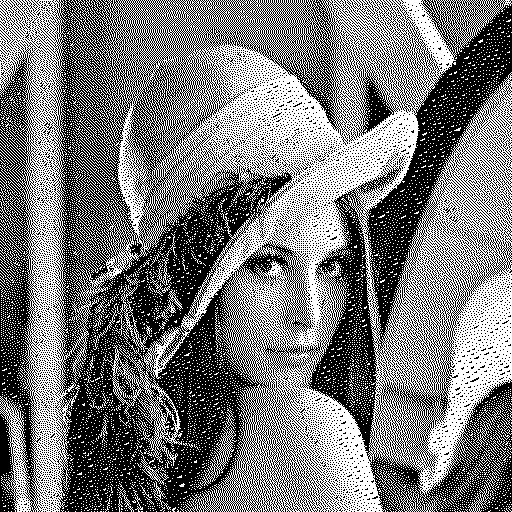

In [12]:
import cv2
import numpy as np

# Load the image
original = cv2.imread('/content/drive/MyDrive/PCVK SMSTR5/Images-20231002T022922Z-001/Images/lena.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Get the height and width of the image
height, width = gray_image.shape

# Define the Floyd-Steinberg dithering matrix
dither_matrix = np.array([
    [0, 0, 7],
    [3, 5, 1]
], dtype=np.float32) / 16.0

# Loop through each pixel of the image
for y in range(height):
    for x in range(width):
        # Get the old pixel value (gray intensity)
        old_pixel = gray_image[y, x]

        # Quantize the pixel value based on the Floyd-Steinberg algorithm
        new_pixel = round(old_pixel / 255) * 255

        # Update the pixel value in the image
        gray_image[y, x] = new_pixel

        # Calculate the quantization error
        quant_error = old_pixel - new_pixel

        # Diffusion of the quantization error to neighboring pixels
        for dx in range(-1, 2):
            for dy in range(2):
                if 0 <= x + dx < width and 0 <= y + dy < height:
                    gray_image[y + dy, x + dx] += quant_error * dither_matrix[dy, dx + 1]

# Display the dithered image
cv2_imshow(gray_image)